## Data Exploration & Data Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zillow_dataframe = pd.read_excel('pandas_to_excel.xlsx')

In [2]:
zillow_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
Unnamed: 0       500 non-null int64
Address          500 non-null object
List_price       500 non-null int64
Address.1        500 non-null object
City             500 non-null object
Zipcode          500 non-null int64
Zestimate        500 non-null int64
Bed              500 non-null int64
Bath             500 non-null float64
House_size       500 non-null int64
House_type       500 non-null object
Year_Built       500 non-null int64
Parking          500 non-null object
Lot              500 non-null float64
HOA              500 non-null int64
Price_Sqft       500 non-null int64
walk_score       500 non-null int64
walk_desc        500 non-null object
transit_score    500 non-null int64
transit_desc     500 non-null object
dtypes: float64(2), int64(11), object(7)
memory usage: 78.2+ KB


In [3]:
for x in ['List_price','Zestimate','House_type','Bed','Bath','House_size','Year_Built','Lot',
          'HOA','Price_Sqft','walk_score','transit_score','walk_desc']:
    print(x,zillow_dataframe[x].value_counts().shape)
    print('-'*50)

List_price (396,)
--------------------------------------------------
Zestimate (497,)
--------------------------------------------------
House_type (8,)
--------------------------------------------------
Bed (12,)
--------------------------------------------------
Bath (16,)
--------------------------------------------------
House_size (408,)
--------------------------------------------------
Year_Built (113,)
--------------------------------------------------
Lot (220,)
--------------------------------------------------
HOA (141,)
--------------------------------------------------
Price_Sqft (364,)
--------------------------------------------------
walk_score (91,)
--------------------------------------------------
transit_score (60,)
--------------------------------------------------
walk_desc (11,)
--------------------------------------------------


In [4]:
for x in ['House_type','Bed','Bath','Year_Built']:
    print(x,zillow_dataframe[x].value_counts())
    print("-"*50)

House_type Single Family            258
Condo                    141
Townhouse                 32
Multi Family              17
Mobile / Manufactured     14
Vacant Land               14
Multiple Occupancy        13
0                         11
Name: House_type, dtype: int64
--------------------------------------------------
Bed 2     129
3     128
4     100
5      53
0      41
1      23
6      17
8       4
7       2
11      1
10      1
9       1
Name: Bed, dtype: int64
--------------------------------------------------
Bath 2.00     183
3.00     108
1.00      67
4.00      45
0.00      41
5.00      16
6.00      12
2.50       9
4.50       4
3.50       3
1.50       3
7.00       3
2.25       2
8.00       2
5.50       1
10.00      1
Name: Bath, dtype: int64
--------------------------------------------------
Year_Built 2020    24
0       23
1971    20
2018    18
1984    11
        ..
1933     1
1966     1
1962     1
2019     1
1926     1
Name: Year_Built, Length: 113, dtype: int64
-----------

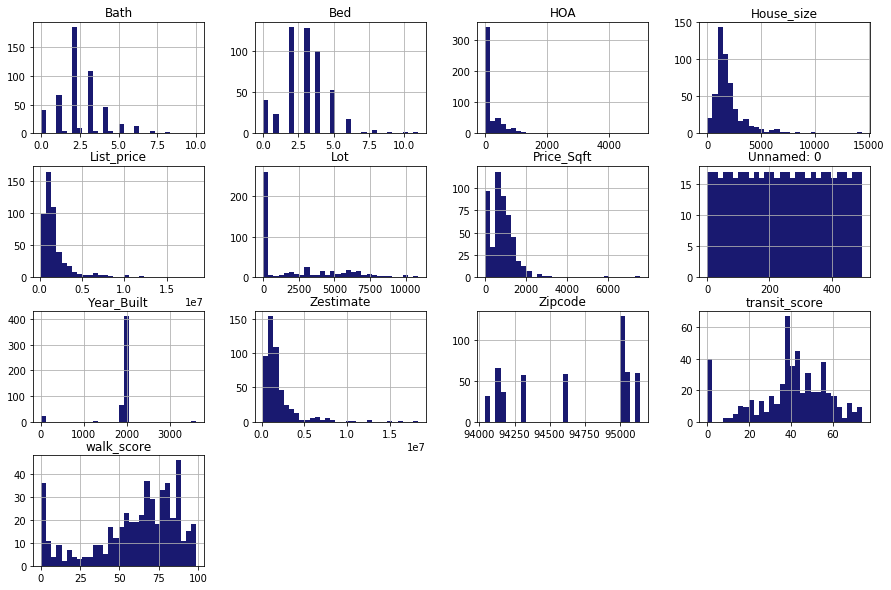

In [5]:
zillow_dataframe.hist(bins=30,figsize=(15, 10),color='midnightblue');

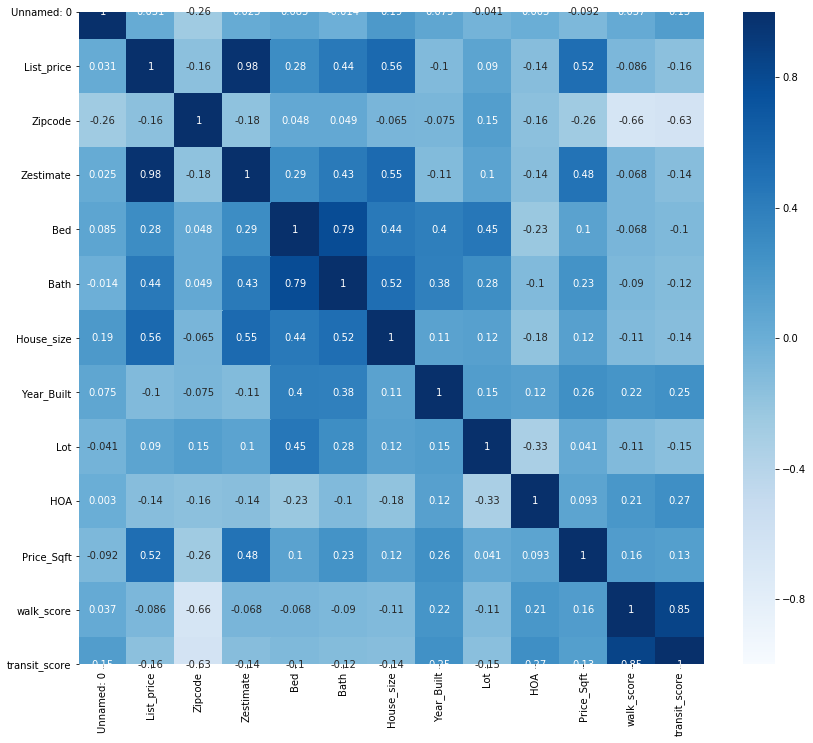

In [6]:
import seaborn as sns
correlation = zillow_dataframe.corr()
# display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="Blues")

<font style="text-align:left;font-family:Garamond;font-size: 25px"> <b> <i>Correlation Between the Price variable and Predictors</i> </b>
***
<font style="text-align:left;font-family:Calibri;font-size: 16px">


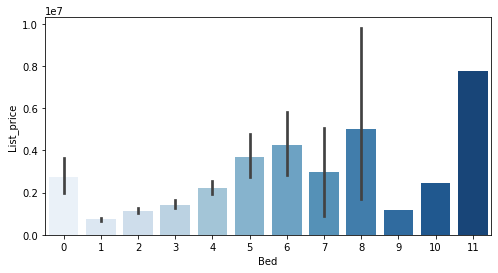

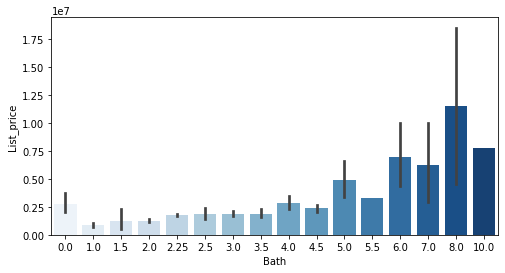

In [7]:
for x in ['Bed','Bath']:
    plt.figure(figsize=(8,4))
    sns.barplot(x=zillow_dataframe[x],y=zillow_dataframe["List_price"],palette="Blues")

In [8]:
zillow_dataframe.drop(zillow_dataframe[zillow_dataframe['House_type'] == 0].index, inplace = True) 

In [9]:
df=zillow_dataframe
df.dtypes

Unnamed: 0         int64
Address           object
List_price         int64
Address.1         object
City              object
Zipcode            int64
Zestimate          int64
Bed                int64
Bath             float64
House_size         int64
House_type        object
Year_Built         int64
Parking           object
Lot              float64
HOA                int64
Price_Sqft         int64
walk_score         int64
walk_desc         object
transit_score      int64
transit_desc      object
dtype: object

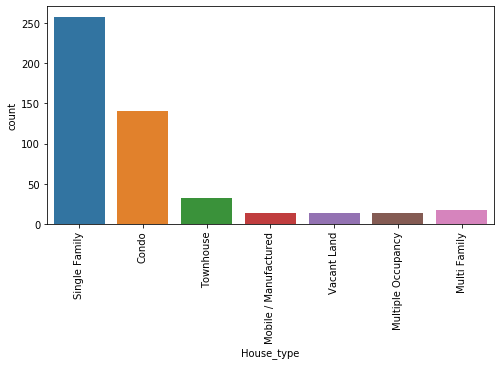

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(zillow_dataframe['House_type'])
plt.xticks(rotation=90)
plt.show()

In [11]:
zillow_dataframe['walk_desc'] = zillow_dataframe['walk_desc'].str.lstrip()
zillow_dataframe.drop(zillow_dataframe[zillow_dataframe['transit_desc'] == 0].index, inplace = True)
zillow_dataframe.drop(zillow_dataframe[zillow_dataframe['transit_desc'] == 'o Nearby Transit'].index, inplace = True) 

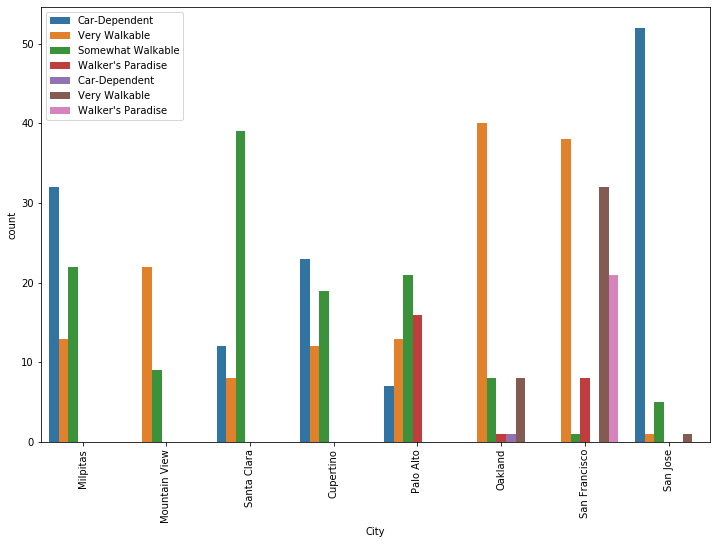

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(zillow_dataframe['City'],hue=zillow_dataframe['walk_desc'])
plt.legend(loc=2)
plt.xticks(rotation=90)
plt.show()

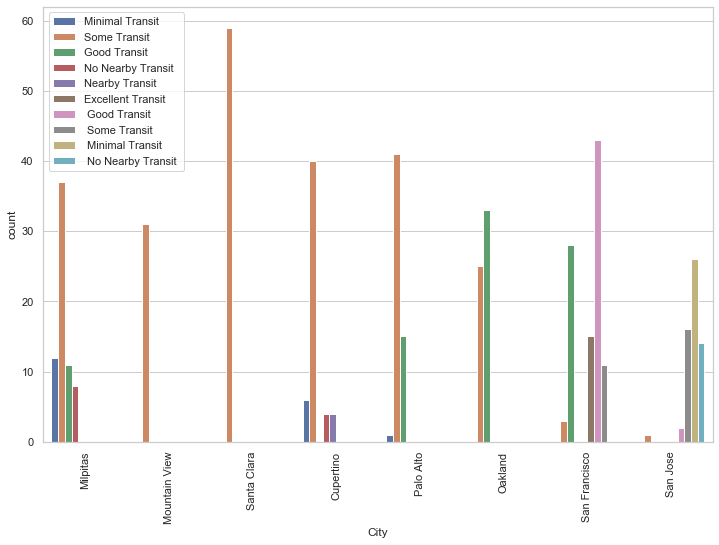

In [13]:
plt.figure(figsize=(12,8))
sns.set(style='whitegrid')
sns.countplot(zillow_dataframe['City'],hue=zillow_dataframe['transit_desc'])
plt.legend(loc=2)
plt.xticks(rotation=90)
plt.show()

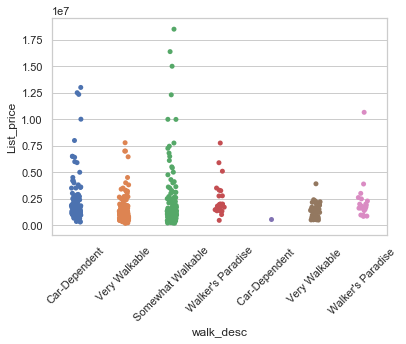

In [14]:
sns.stripplot(x="walk_desc",y='List_price',data=zillow_dataframe)
plt.xticks(rotation=45)
plt.show()

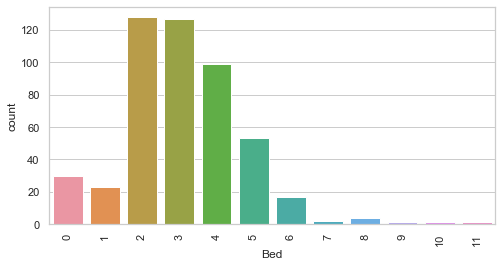

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(zillow_dataframe['Bed'])
plt.xticks(rotation=90)
plt.show()

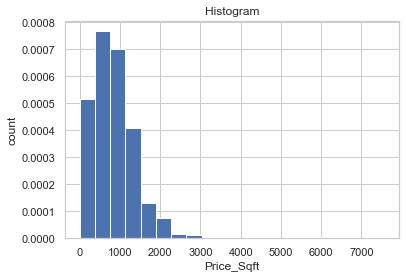

In [16]:
#Histogram

num_bins = 20
x=list(df['Price_Sqft'] )
#plt.hist(x) # Without specifying bins, then by default it is 10. 
#plt.hist(x, bins=num_bins)
plt.hist(x, num_bins, density=1)
#plt.hist(x, num_bins, normed=True, facecolor='g')

plt.xlabel('Price_Sqft')
plt.ylabel('count')
plt.title('Histogram')

# Question: do you know how to display other greek characters which is quite useful in math reprentation?
plt.show()

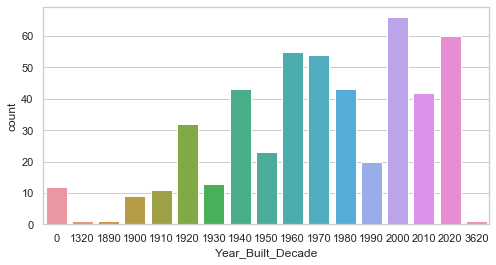

In [17]:
# Bar Chart
# Bar Chart	Metric1	number of houses listed based 1970,1980,1990,2000


df['Year_Built_Decade']= round(df['Year_Built'],-1)
lst=df['Year_Built_Decade'].value_counts()

plt.figure(figsize=(8,4))
sns.countplot(df['Year_Built_Decade'])
plt.show()


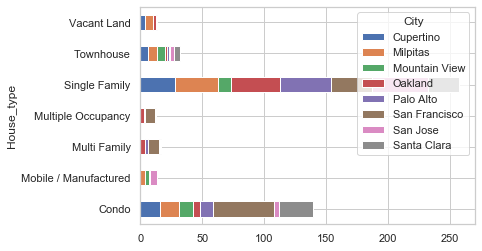

In [18]:
#Stacked bar chart

ct=pd.crosstab(df.House_type,df.City)
ct
ct.plot.barh(stacked=True)

['Cupertino', 'Milpitas', 'Mountain View', 'Oakland', 'Palo Alto', 'San Francisco', 'San Jose', 'Santa Clara'] [-48602.09259259259, 12419.514705882353, 21721.677419354837, 4817.9655172413795, -123113.84210526316, 48486.52, -92470.52542372882, 25769.93220338983]


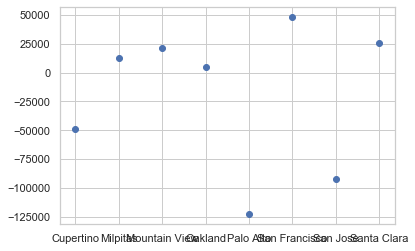

In [19]:
# Scatter plot
df['Estimate_Difference']= df['Zestimate'] - df['List_price']
# print(df['Estimate_Difference'])
ab=df.groupby('City')['Estimate_Difference'].mean()
type(ab)
print(list(ab.index),list(ab.values) )
x=list(ab.index)
y=list(ab.values) 

plt.scatter(x, y,alpha=1) 
plt.show()

In [20]:
# grouped bar chart
#data=pd.read_csv('zillow_final_data.csv')

import seaborn as sns
# seaborn.barplot has a hue option that enables us to split by an additional categorical value. 
#sns.barplot(x='Price_Sqft',y='Zipcode',hue='House_type',data=zillow_dataframe,orient='h')
#sns.set(style='whitegrid')
#sns.set(style='darkgrid')


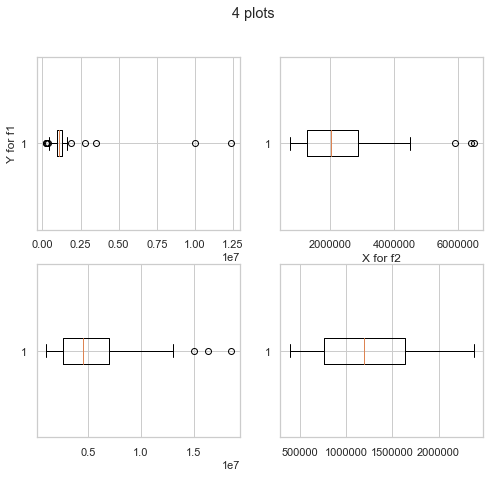

In [21]:
# box plot

import numpy as np
import matplotlib.pyplot as plt

df1=df [ df['City']== 'Milpitas' ] 
df2=df [ df['City']== 'Cupertino' ] 
df3=df [ df['City']== 'Palo Alto' ] 
df4=df [ df['City']== 'Santa Clara' ] 

#List_price

fig=plt.figure(figsize=(8,7))
f1=fig.add_subplot(2,2,1)  
f2=fig.add_subplot(2,2,2)
f3=fig.add_subplot(2,2,3)
f4=fig.add_subplot(2,2,4)


data=np.random.randn(50)
f1.boxplot(df1['List_price'],vert=False) 
f2.boxplot(df2['List_price'],vert=False) 
f3.boxplot(df3['List_price'],vert=False) 
f4.boxplot(df4['List_price'],vert=False) 
f1.set_ylabel('Y for f1')
f2.set_xlabel('X for f2')
fig.suptitle('4 plots')

plt.show()

Index(['San Francisco', 'Milpitas', 'San Jose', 'Santa Clara', 'Oakland',
       'Palo Alto', 'Cupertino', 'Mountain View'],
      dtype='object') [100  68  59  59  58  57  54  31]


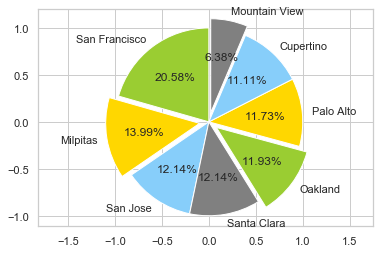

In [22]:
# pie chart

lst=df['City'].value_counts()
# df.groupby('Year_Built')['Address'].count()
print(lst.index,lst.values)
x=list(lst.index)
y=list(lst.values)
# The slices will be ordered and plotted counter-clockwise.

labels =list(lst.index)
A =list(lst.values)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'grey','yellowgreen', 'gold', 'lightskyblue', 'grey']
explode = (0, 0.1,0,0,0.1,0,0,0.1)
plt.pie(A, explode=explode, labels=labels, colors=colors,
        autopct='%.2f%%', pctdistance = 0.6, shadow=False, startangle=90, frame = True)
plt.axis('equal')
#plt.show()
plt.savefig('piechart.png',dpi=400)

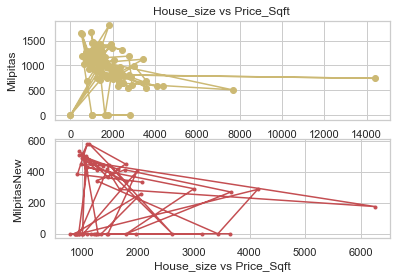

In [23]:
#line chart in 2 two subplots

df1=df [ df['City']== 'San Francisco' ] 

df2=df [ df['City']== 'Oakland' ] 




x1 = df1['House_size']
y1 = df1['Price_Sqft']

x2 = df2['House_size']
y2= df2['Price_Sqft']


plt.subplot(2, 1, 1) # subplot(nrows, ncols, plot_number)
plt.plot(x1, y1, 'yo-')
plt.xlabel('House_size')
plt.ylabel('SFO_Price_Sqft')


plt.subplot(2, 1, 2) # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plt.plot(x2, y2, 'r.-')
plt.xlabel('House_size')
plt.ylabel('Oakland_Price_Sqft')



plt.show()





(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

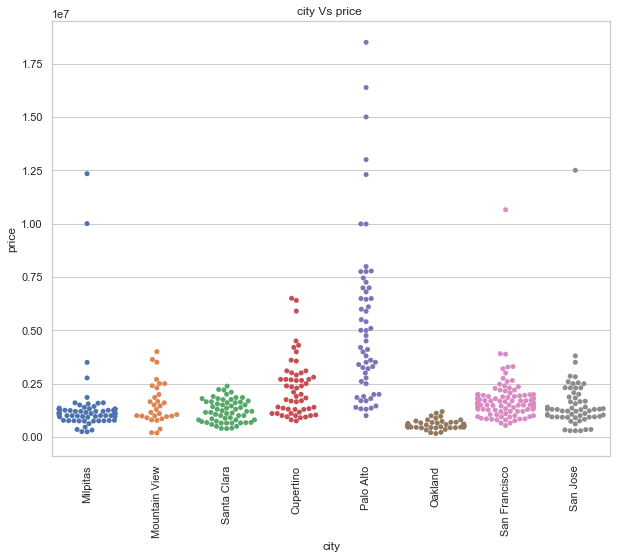

In [24]:
plt.figure(figsize=(10,8))
sns.swarmplot("City","List_price",data=df)
plt.title("city Vs price ")
plt.ylabel("price")
plt.xlabel("city")
plt.xticks(rotation=90)

## Statistical Models for Predicting House Prices

In [25]:
zillow_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 499
Data columns (total 22 columns):
Unnamed: 0             486 non-null int64
Address                486 non-null object
List_price             486 non-null int64
Address.1              486 non-null object
City                   486 non-null object
Zipcode                486 non-null int64
Zestimate              486 non-null int64
Bed                    486 non-null int64
Bath                   486 non-null float64
House_size             486 non-null int64
House_type             486 non-null object
Year_Built             486 non-null int64
Parking                486 non-null object
Lot                    486 non-null float64
HOA                    486 non-null int64
Price_Sqft             486 non-null int64
walk_score             486 non-null int64
walk_desc              485 non-null object
transit_score          486 non-null int64
transit_desc           486 non-null object
Year_Built_Decade      486 non-null int64
Es

In [26]:
zillow_dataframe.isnull().sum()

Unnamed: 0             0
Address                0
List_price             0
Address.1              0
City                   0
Zipcode                0
Zestimate              0
Bed                    0
Bath                   0
House_size             0
House_type             0
Year_Built             0
Parking                0
Lot                    0
HOA                    0
Price_Sqft             0
walk_score             0
walk_desc              1
transit_score          0
transit_desc           0
Year_Built_Decade      0
Estimate_Difference    0
dtype: int64

In [27]:
for x in ['City','Zipcode','Bed','Bath','House_type','Parking']:
    print('-'*50)
    print(x)
    print(zillow_dataframe[x].value_counts(dropna=False))
    print('-'*50)

--------------------------------------------------
City
San Francisco    100
Milpitas          68
San Jose          59
Santa Clara       59
Oakland           58
Palo Alto         57
Cupertino         54
Mountain View     31
Name: City, dtype: int64
--------------------------------------------------
--------------------------------------------------
Zipcode
95035    68
94122    64
95051    59
94603    58
94301    57
95014    54
94158    36
94040    31
95138    29
95148    26
95127     1
95124     1
95123     1
95122     1
Name: Zipcode, dtype: int64
--------------------------------------------------
--------------------------------------------------
Bed
2     128
3     127
4      99
5      53
0      30
1      23
6      17
8       4
7       2
11      1
10      1
9       1
Name: Bed, dtype: int64
--------------------------------------------------
--------------------------------------------------
Bath
2.00     182
3.00     107
1.00      67
4.00      44
0.00      30
5.00      16
6.00      

In [28]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","/"," "]
for char in spec_chars:
    zillow_dataframe['House_type'] = zillow_dataframe['House_type'].str.replace(char, '')
    zillow_dataframe['Parking'] = zillow_dataframe['Parking'].str.replace(char, '')
    zillow_dataframe['City'] = zillow_dataframe['City'].str.replace(char, '')

In [29]:
zillow_dataframe["Parking"] = zillow_dataframe['Parking'].str.replace('spaces','')
zillow_dataframe["Parking"] = zillow_dataframe['Parking'].str.replace('space','')
zillow_dataframe["Parking"] = zillow_dataframe['Parking'].str.replace('AttachedGarage','1')
zillow_dataframe["Parking"] = zillow_dataframe['Parking'].str.replace('Carport','0')
zillow_dataframe["Parking"] = zillow_dataframe['Parking'].str.replace('DetachedGarage','1')
zillow_dataframe["Parking"] = zillow_dataframe['Parking'].str.replace('Offstreet','0')

In [30]:
zillow_dataframe = zillow_dataframe.fillna(0)
zillow_dataframe["Parking"] = zillow_dataframe['Parking'].astype('int')
#zillow_dataframe["Zipcode"] = zillow_dataframe['Zipcode'].astype('int')

In [31]:
zillow_dataframe.columns
zillow_reg = zillow_dataframe[['List_price', 'Zipcode', 'Bed',
       'Bath', 'House_size', 'Year_Built', 'Parking', 'Lot',
       'HOA', 'Price_Sqft', 'walk_score', 'transit_score'
       ]]

In [32]:
for x in ['Parking']:
    print('-'*50)
    print(x)
    print(zillow_reg[x].value_counts(dropna=False))
    print('-'*50)

--------------------------------------------------
Parking
2     169
1     152
0     133
4      13
3      11
6       4
12      1
8       1
7       1
5       1
Name: Parking, dtype: int64
--------------------------------------------------


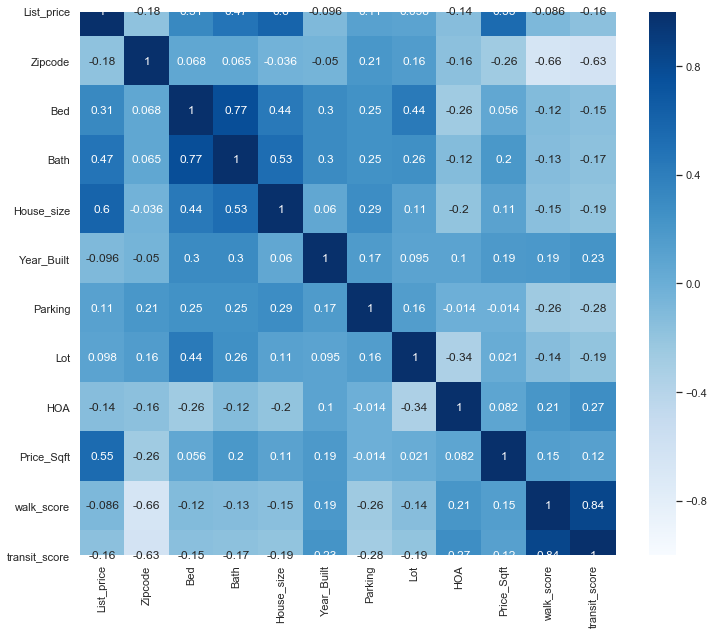

In [33]:
correlation = zillow_reg.corr()
# display(correlation)
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="Blues")

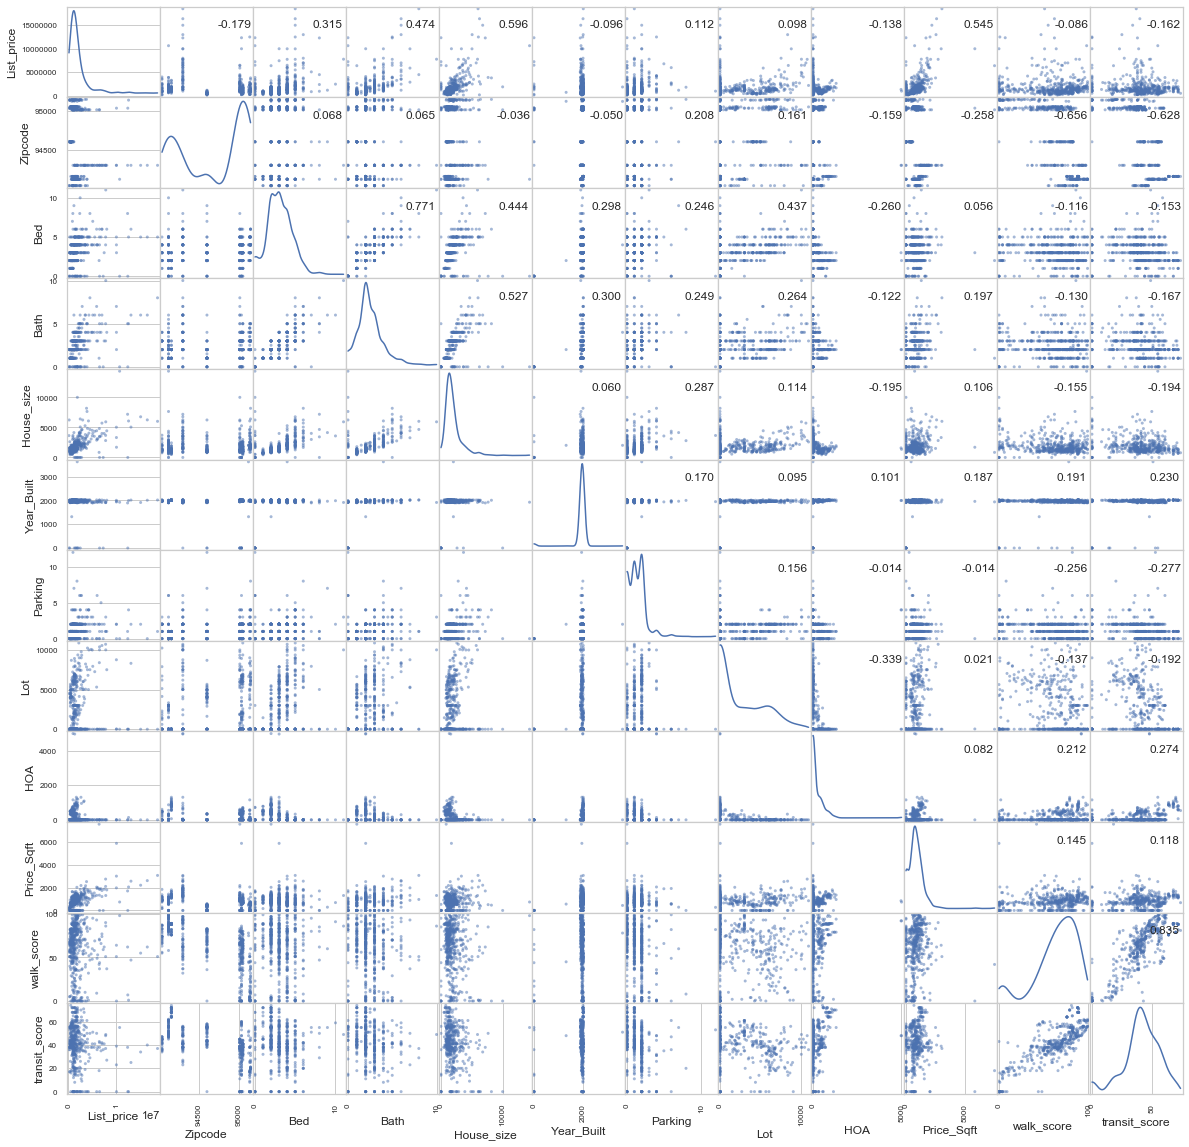

In [34]:
from pandas.plotting import scatter_matrix 

axes = scatter_matrix(zillow_reg, alpha=0.5, diagonal='kde',figsize=(20, 20))
corr = zillow_reg.corr().values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

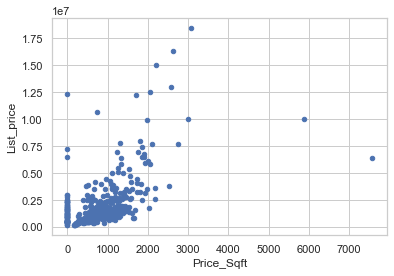

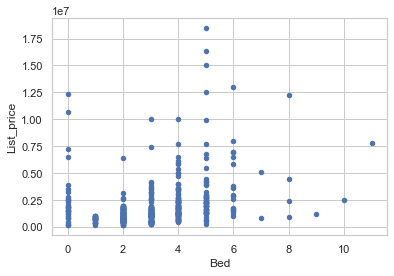

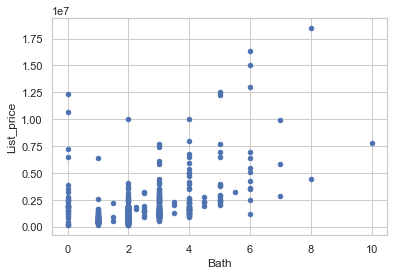

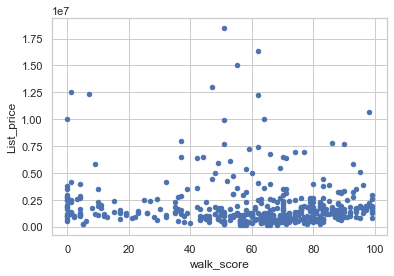

In [35]:
zillow_dataframe.plot(x ='Price_Sqft', y='List_price', kind = 'scatter')
zillow_dataframe.plot(x ='Bed', y='List_price', kind = 'scatter')
zillow_dataframe.plot(x ='Bath', y='List_price', kind = 'scatter')
zillow_dataframe.plot(x ='walk_score', y='List_price', kind = 'scatter')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, LassoCV, BayesianRidge,ElasticNet,ElasticNetCV

from sklearn import preprocessing  # imputing and scale

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection,stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import itertools 

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error   #RMSE

predictors = ['Bed',
       'Bath', 'House_size', 'Year_Built', 'Parking', 'Lot',
       'HOA', 'Price_Sqft', 'walk_score', 'transit_score']
outcome = 'List_price'

ModuleNotFoundError: No module named 'dmba'

In [ ]:
X = zillow_reg[predictors]
y = zillow_reg[outcome]

In [ ]:
train_X, temp_X, train_y, temp_y = train_test_split(X, y, test_size=0.5, random_state=1)
valid_X, test_X, valid_y, test_y = train_test_split(temp_X, temp_y, test_size=0.3, random_state=1)

print('Training : ', train_X.shape)
print('Validation : ', valid_X.shape)
print('Test : ', test_X.shape)

In [ ]:
#train model using training data
train_X

In [ ]:
#actual value
train_y

## Linear Regression

In [ ]:
lm = LinearRegression()
lm.fit(train_X,train_y)

In [ ]:
print(pd.DataFrame({'Predictor': X.columns, 'coefficient':
(lm.coef_)}))

In [ ]:
# Regression Summary - RMSE, MAE, MPE, MAPE
regressionSummary(train_y, lm.predict(train_X))

In [ ]:
lm_pred = lm.predict(valid_X)

In [ ]:
result = pd.DataFrame({'Predicted': lm_pred, 'Actual':
valid_y,'Residual': valid_y - lm_pred})
print(result.head(20))

In [ ]:
regressionSummary(valid_y, lm_pred)

In [ ]:
lm_pred = lm.predict(valid_X)
all_residuals = valid_y - lm_pred
# Determine the percentage of datapoints with a residual in [-1406, 1406] = approx.
# 75%
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))
pd.DataFrame(all_residuals).hist(bins=25)
plt.show()

In [ ]:
def findsubsets(s, n): 
    return list(map(set, itertools.combinations(s, n)))

In [ ]:
findsubsets(train_X.columns,49)

In [ ]:
lm = LinearRegression()
lm.fit(train_X,train_y)

In [ ]:
model=LinearRegression()
reg  = model.fit(train_X, train_y) #
#features -> train_X
#outcome -> train_y
#training data predictor/features and the actual #
            
#how did we do against the training set

pred_train = reg.predict(train_X)  #predicts outcome training data

pred_valid = reg.predict(valid_X)  #predicts outcome using the validation data

print("train RMSE: "+str(mean_squared_error(train_y,pred_train)))

print("validation RMSE: "+str(mean_squared_error(valid_y,pred_valid)))

In [ ]:

def exhaustive(model,train_X,train_y,valid_X,valid_y):
    low_err=600000**2

    for x in range(len(train_X.columns),0,-1):
        n=x
        #print("number of features "+str(n))
        ss=findsubsets(train_X.columns,n)
        print("_"*50)
        print(str(len(ss))+" model(s) using "+ str(n)+ " features")
        for z in range(0,len(ss)):
        
            model = model
            reg  = model.fit(train_X[ss[z]], train_y)
            pred_train = reg.predict(train_X[ss[z]])
            err_train= mean_squared_error(train_y, pred_train)
            
            
            pred_valid = reg.predict(valid_X[ss[z]])
            err_valid = mean_squared_error(valid_y, pred_valid)
            mae_valid = mean_absolute_error(valid_y,pred_valid)    
        
            if err_valid < low_err:
                low_err=err_valid
                low_err_features=list(ss[z])
                print("_"*50)
                print(low_err_features)
                print("RMSE train: "+str(err_train ** .5))
                print("MSE validation: "+str(low_err))
                print("RMSE validation: "+str(low_err ** .5))
                print("MAE validation: "+str(mae_valid))
                abs(valid_y-pred_valid).hist()
                plt.show()
                print("_"*50)

In [ ]:
exhaustive(model=LinearRegression(normalize=True,n_jobs=-1), train_X=train_X, train_y=train_y,valid_X=valid_X,valid_y=valid_y )

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_reg = RandomForestRegressor()
random_reg.fit(train_X,train_y)

test_X = test_X[predictors]

predicted_prices = random_reg.predict(test_X)
print(predicted_prices)

In [ ]:
test_X

In [ ]:
test_y

### GridSearchCV Using RandomForest Regressor

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt 


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from dmba import plotDecisionTree

from sklearn.metrics import mean_squared_error



# user grid search to find optimized tree

param_grid = {
    'max_depth': [5],#list(np.arange(6,12)), 
    'min_samples_split':[5],# list(np.arange(1,8)), 
    'max_leaf_nodes': [52],#list(np.arange(35,54)),  
#    'min_samples_leaf':  list(np.arange(2,6)) , #does not improve MSE
#    'max_features': [7],    
#    'n_estimators': list(np.arange(10,150,10))#list(np.arange(100,1200,200)),
}
gridSearch = GridSearchCV(RandomForestRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

rf = gridSearch.best_estimator_

print("RMSE: "+str(mean_squared_error(valid_y, rf.predict(valid_X))**.5))


In [ ]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': rf.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()

### GridSearchCV using GradientBoostingRegressor

In [ ]:
# user grid search to find optimized tree

param_grid = {
    
    'learning_rate':list(np.arange(0.01,0.22,.01)),  #choose initial high learning rate
    'min_samples_split': list(np.arange(3,7)),#'
#    'min_samples_leaf': list(np.arange(2,5)) ,#does not reduce error
#    'max_depth':list(np.arange(2,7)), #
######    'subsample': list(np.arange(0.77,0.83,.01)),
    'max_leaf_nodes': list(np.arange(4,7)), 
#    'max_features': [2,3,4,5,6,7], 
}

gridSearch = GridSearchCV(GradientBoostingRegressor(random_state=1), 
                          param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

gbm = gridSearch.best_estimator_

print("RMSE: "+str(mean_squared_error(valid_y, gbm.predict(valid_X))**.5))

In [ ]:
# Variable importance
importance = pd.DataFrame({'features': train_X.columns, 
                           'importance': gbm.feature_importances_})
importance.index=importance.features
importance.sort_values(by='importance', ascending=True).plot.barh()